<h1>Task 5: Classification Tasks Overview</h1>

<h3>Task 1: Student Pass/Fail Prediction </h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

<h5>Load Dataset</h5>

In [2]:
df = pd.read_csv("C:/Users/Student/Desktop/23KN1A0583/student_pass_fail_dataset.csv")

print("First 5 rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())

First 5 rows:
    Study Hours  Attendance  Pass
0            7          51     1
1            4          73     0
2            8          72     1
3            5          87     0
4            7          94     0

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Study Hours  100 non-null    int64
 1   Attendance   100 non-null    int64
 2   Pass         100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None


<h3>Step 1: Data Exploration</h3>

In [3]:
print("Missing values:\n", df.isnull().sum())
print("\nData Description:\n", df.describe())

Missing values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64

Data Description:
        Study Hours  Attendance        Pass
count   100.000000  100.000000  100.000000
mean      5.910000   70.610000    0.440000
std       2.871296   16.790988    0.498888
min       1.000000   40.000000    0.000000
25%       3.000000   57.750000    0.000000
50%       6.000000   71.500000    0.000000
75%       8.000000   83.000000    1.000000
max      10.000000  100.000000    1.000000


<h6>Outlier Check</h6>

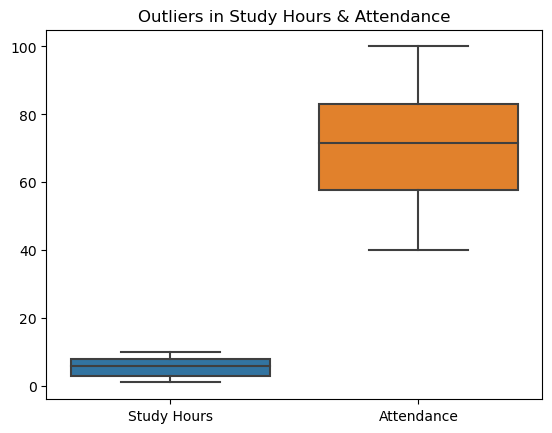

In [4]:
sns.boxplot(data=df[["Study Hours","Attendance"]])
plt.title("Outliers in Study Hours & Attendance")
plt.show()

<h6>Relationship Plot</h6>

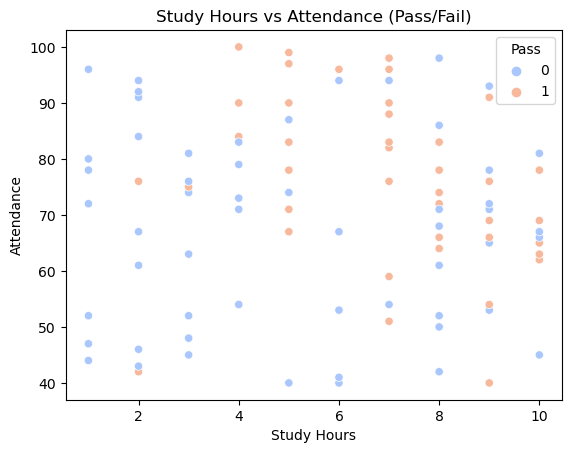

In [5]:
sns.scatterplot(x="Study Hours", y="Attendance", hue="Pass", data=df, palette="coolwarm")
plt.title("Study Hours vs Attendance (Pass/Fail)")
plt.show()

<h3>Step 2: Model Training</h3>

In [6]:
X = df[["Study Hours", "Attendance"]]
y = df["Pass"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<h3>Step 3: Model Evaluation</h3>

 Accuracy: 0.5333333333333333


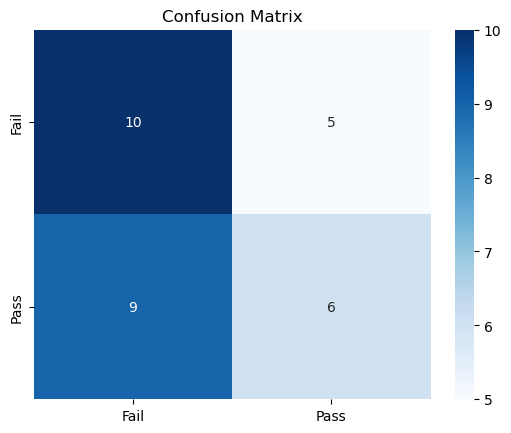

In [7]:
y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail","Pass"], yticklabels=["Fail","Pass"])
plt.title("Confusion Matrix")
plt.show()

<h2>Task 2: Sentiment Analysis with Natural Language Processing </h2>

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Step 1: Load Dataset</h3>

In [9]:
df = pd.read_csv("C:/Users/Student/Desktop/23KN1A0583/reviews_dataset.csv")
print("First 5 rows:\n", df.head())

First 5 rows:
                                       Review Text Sentiment
0  The product quality is excellent and I love it  positive
1            Very bad experience, waste of money!  negative
2                Fast delivery and nice packaging  positive
3             Worst service ever, not recommended  negative
4                Amazing product! works perfectly  positive


<h3>Step 2: Preprocessing </h3>

Before using stopwords & WordNetLemmatizer, import

In [10]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

WordNetLemmatizer sometimes needs omw-1.4.

In [11]:
import nltk
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

<h6># Download resources</h6>

In [13]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<h6># Initialize tools</h6>

In [14]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

<h6># Preprocessing function</h6>

In [16]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)   # remove special chars
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

<h6># Apply preprocessing</h6>

In [17]:
df["Cleaned Review"] = df["Review Text"].apply(preprocess)
print(df.head())

                                      Review Text Sentiment  \
0  The product quality is excellent and I love it  positive   
1            Very bad experience, waste of money!  negative   
2                Fast delivery and nice packaging  positive   
3             Worst service ever, not recommended  negative   
4                Amazing product! works perfectly  positive   

                   Cleaned Review  
0  product quality excellent love  
1      bad experience waste money  
2    fast delivery nice packaging  
3  worst service ever recommended  
4  amazing product work perfectly  


<h3>Step 3: Vectorization </h3>

In [24]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["Review Text"])   
y = df["Sentiment"]

# Show TF-IDF details
print("\nShape of TF-IDF Matrix:", X.shape)   
print("\nExample Features (first 20 words):")
print(tfidf.get_feature_names_out()[:20]) 


Shape of TF-IDF Matrix: (100, 82)

Example Features (first 20 words):
['again' 'amazing' 'and' 'bad' 'battery' 'best' 'broken' 'buy' 'came'
 'cheap' 'customer' 'delivery' 'design' 'disappointed' 'don' 'ever'
 'excellent' 'experience' 'extremely' 'fast']


<h3>Step 4: Train-Test Split</h3>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Show split details
print("\nTraining set size:", X_train.shape, "Test set size:", X_test.shape)
print("\nTraining labels distribution:\n", y_train.value_counts())
print("\nTest labels distribution:\n", y_test.value_counts())


Training set size: (70, 82) Test set size: (30, 82)

Training labels distribution:
 Sentiment
negative    38
positive    32
Name: count, dtype: int64

Test labels distribution:
 Sentiment
positive    18
negative    12
Name: count, dtype: int64


<h3>Step 5: Train Logistic Regression</h3>

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<h3>Step 6: Evaluation</h3>

In [27]:
y_pred = model.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred, pos_label="positive"))
print(" Recall:", recall_score(y_test, y_pred, pos_label="positive"))
print(" F1 Score:", f1_score(y_test, y_pred, pos_label="positive"))


 Accuracy: 1.0
 Precision: 1.0
 Recall: 1.0
 F1 Score: 1.0


<h3> Step 7: Confusion Matrix</h3>

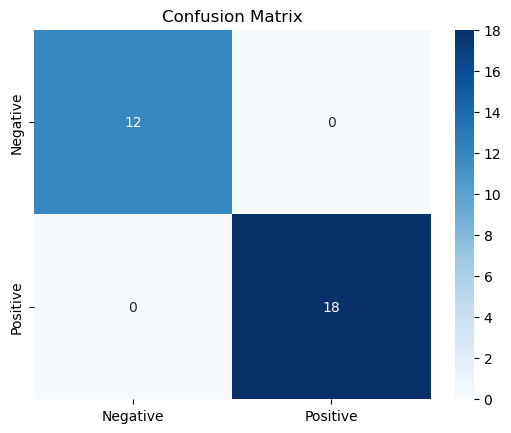

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
plt.title("Confusion Matrix")
plt.show()